# 🚀 Inait Predict API Examples - Getting Started Guide

Welcome to the **Inait Predict** time series forecasting platform! This notebook demonstrates how to use our powerful forecasting API with intuitive, user-friendly model names.

## 🎯 What You'll Learn
- How to make predictions using different forecasting models
- How to create visualizations of your forecasts
- How to generate model explanations for interpretability
- How to use ensemble methods for improved accuracy

## 🤖 Available Forecasting Models

| Model | Description | Best For |
|-------|-------------|----------|
| **basic** | Simple, interpretable predictions | Quick insights, baseline models |
| **robust** | Stable predictions with regularization | Noisy data, stable forecasts |
| **neural** | Deep learning for complex patterns | Non-linear relationships, complex seasonality |
| **gradient_boost** | High accuracy with mixed data types | Tabular data, feature-rich datasets |
| **fast_boost** | Fast training with excellent performance | Large datasets, time-sensitive applications |

💡 **Pro Tip:** You can combine multiple models (e.g., `"basic,robust,neural"`) for ensemble predictions!

---

## 📋 Prerequisites
Make sure you have your API authentication key and the demo dataset ready.

In [1]:
# Add parent directory to Python path for client imports
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))

# Import the main utility for making API requests
from client.utils import make_request

# 🔧 API Configuration
base_url = "https://"       # Add the URL of your inait forecast deployment/SaaS
auth_key = "your_key_here"  # Replace with your actual API key

# 🛡️ Validate authentication setup
if not auth_key:
    raise ValueError("❌ Authentication key is required. Please check your API credentials.")

if not base_url:
    raise ValueError("❌ Base URL is required. Please check your API endpoint.")

# ✅ Connection verification
print("🎯 Inait Predict API Configuration")
print(f"🌐 Endpoint: {base_url}")
print(f"🔑 Authentication: ✅ Configured")
print(f"📚 API Documentation: {base_url}/docs")
print(f"🧪 Interactive API Explorer: {base_url}/docs#/")

print("\n" + "="*50)
print("🚀 Ready to start forecasting!")
print("📝 Session IDs will be automatically generated")
print("💡 Tip: Check the API docs for advanced parameters")
print("="*50)

🎯 Inait Predict API Configuration
🌐 Endpoint: https://inait08072025-forecaster.azurewebsites.net
🔑 Authentication: ✅ Configured
📚 API Documentation: https://inait08072025-forecaster.azurewebsites.net/docs
🧪 Interactive API Explorer: https://inait08072025-forecaster.azurewebsites.net/docs#/

🚀 Ready to start forecasting!
📝 Session IDs will be automatically generated
💡 Tip: Check the API docs for advanced parameters


# 📊 Making a Prediction Request

In this section, we'll demonstrate how to make a forecasting prediction using the Inait Predict API with **exogenous features** for enhanced model explanations.

## ⚙️ Configuration Parameters

We'll configure the following parameters for our prediction:
- **Model**: Using `"basic"` for a simple, interpretable forecast
- **Data**: Power consumption data from Germany (`demo_power.csv`)
- **Target Column**: `DE_Spot_EPEX_1H_A` (German electricity spot prices)
- **Exogenous Features**: `DE_Residual_Load_15M_A_AVG` and `DE_Consumption_15M_A_AVG` 
- **Forecasting Horizon**: 10 time steps into the future
- **Observation Length**: 24 historical points to base the prediction on

## 🔍 **Why Exogenous Features Matter for Explanations**

By including **external features** alongside our target variable, we unlock powerful explanation capabilities:

✅ **Feature Attribution** - See how each external factor contributed to predictions  
✅ **Multi-Source Intelligence** - Understand both autoregressive patterns and external drivers  
✅ **Enhanced Interpretability** - Get complete transparency into model decision-making  
✅ **Business Insights** - Connect predictions to real-world factors (load, consumption)  

💡 **Model Options**: You can experiment with different models:
- `"basic"` - Simple and interpretable (great for understanding feature contributions)
- `"robust"` - Stable with noise handling
- `"neural"` - Advanced deep learning (complex feature interactions)
- `"gradient_boost"` - High accuracy ensemble (sophisticated feature processing)
- `"basic,robust"` - Multiple models for ensemble predictions

In [2]:
from client.prediction_script import (
    create_payload_from_file,
    get_dataframe_from_response,
)

# 🎯 Configure prediction parameters
prediction_url = base_url + "/prediction"
data_path = "../data/demo_power.csv"  # Sample German power consumption data
target_columns = "DE_Spot_EPEX_1H_A"  # German electricity spot prices (€/MWh)
features =  "DE_Residual_Load_15M_A_AVG,DE_Consumption_15M_A_AVG"
forecasting_horizon = 10  # Predict 10 time steps ahead
observation_length = 24   # Use last 24 points as historical context

# 📦 Create the prediction payload
# This packages your data and parameters into the format expected by the API
payload = create_payload_from_file(
    file_path=data_path,
    target_columns=target_columns,
    forecasting_horizon=forecasting_horizon,
    observation_length=observation_length,
    feature_columns=features,  # Specify features for better context
    models="basic",  # Try: "robust", "neural", or "basic,robust" for ensemble
)

# 🚀 Send prediction request to the API
response = make_request(prediction_url, payload, auth_key=auth_key)

# 📊 Process the response and extract results
df, session_id = get_dataframe_from_response(response)

print(f"✅ Generated session_id: {session_id}")
print(f"📈 Prediction DataFrame shape: {df.shape if df is not None else 'None'}")
print(f"🎯 Columns: {list(df.columns) if df is not None else 'None'}")

# Display the prediction results
df

✅ Generated session_id: 13bded78-3b47-4524-9ff5-93eb42b00060
📈 Prediction DataFrame shape: (10, 4)
🎯 Columns: ['cutoff', 'ds', 'unique_id', 'Inait']


,cutoff,ds,unique_id,Inait
0,2024-03-01 10:00:00,2024-03-01 11:00:00,DE_Spot_EPEX_1H_A,66.499779
1,2024-03-01 10:00:00,2024-03-01 12:00:00,DE_Spot_EPEX_1H_A,64.784689
2,2024-03-01 10:00:00,2024-03-01 13:00:00,DE_Spot_EPEX_1H_A,62.399538
3,2024-03-01 10:00:00,2024-03-01 14:00:00,DE_Spot_EPEX_1H_A,60.410733
4,2024-03-01 10:00:00,2024-03-01 15:00:00,DE_Spot_EPEX_1H_A,58.976952
5,2024-03-01 10:00:00,2024-03-01 16:00:00,DE_Spot_EPEX_1H_A,61.730996
6,2024-03-01 10:00:00,2024-03-01 17:00:00,DE_Spot_EPEX_1H_A,71.811032
7,2024-03-01 10:00:00,2024-03-01 18:00:00,DE_Spot_EPEX_1H_A,79.087889
8,2024-03-01 10:00:00,2024-03-01 19:00:00,DE_Spot_EPEX_1H_A,77.908238
9,2024-03-01 10:00:00,2024-03-01 20:00:00,DE_Spot_EPEX_1H_A,70.464161


# 📈 Visualizing Your Predictions

Now let's create a visual representation of our forecasting results! This plot will show:
- **Historical data** (actual values used for training)
- **Predicted values** (forecasted points)
- **Confidence intervals** (uncertainty bounds)

The visualization helps you quickly assess:

✅ How well the model captures historical patterns  
✅ The forecast trajectory and trends  
✅ The uncertainty level in predictions

📈 Plot shows: Historical data (blue) + Predictions (green)


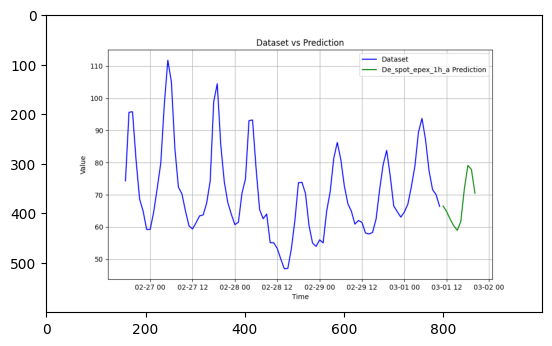

In [3]:
from client.plot_script import create_plot_payload, plot_image, bytes_from_base64

# 🎨 Configure plotting parameters
plot_url = base_url + "/plot"
plot_type = "prediction"  # Generate a prediction visualization

# 📊 Create a plotting payload using our session from the prediction
# The session_id links this plot to our previous prediction request
payload = create_plot_payload(
    session_id, 
    plot_type, 
    cutoff_date=None,      # No specific cutoff needed for prediction plots
    prediction_for=None    # Plot all predictions
)

# 🖼️ Request the plot from the API
response = make_request(plot_url, payload, auth_key=auth_key)

# 🎯 Extract and display the generated image
# The API returns plots as base64-encoded images
image_bytes = bytes_from_base64(response["response"]["data"])
plot_image(image_bytes)

print("📈 Plot shows: Historical data (blue) + Predictions (green)")

# 🔍 Understanding Your Model with Explanations

Model explainability is crucial for building trust and understanding how predictions are made. Since we're using **exogenous features** (`DE_Residual_Load_15M_A_AVG` and `DE_Consumption_15M_A_AVG`) along with our target variable, the explanations will provide rich insights into how different components influence predictions.

## 🎯 What You'll Get

### 📊 **Feature Contribution Analysis**
- **Exogenous Feature Impact** - How each external feature (`Residual_Load`, `Consumption`) contributed to specific predictions
- **Feature Interactions** - Understanding relationships between different input variables
- **Relative Importance** - Which features have the strongest influence at different time points

### ⏰ **Autoregressive Component Insights**
- **Temporal Dependencies** - How different historical time steps influenced the current prediction
- **Time Step Importance** - Which past observations were most critical for forecasting
- **Pattern Recognition** - Understanding how the model weighs recent vs. distant history

### 🧠 **Model Decision Process**
- **Multi-feature Decision Making** - How the model combines autoregressive patterns with exogenous signals
- **Time-varying Feature Importance** - How feature contributions change across the forecast horizon
- **Feature Attention Patterns** - When the model pays attention to specific features vs. historical patterns

## 📅 Explanation Parameters
- **Cutoff Date**: `2024-03-01 10:00:00` - The point in time for explanation analysis
- **Session ID**: Automatically retrieved from our previous prediction request
- **Features Analyzed**: Target variable + 2 exogenous features (Residual Load & Consumption)

💡 **Key Insight**: With exogenous features, explanations reveal both **what happened in the past** (autoregressive) and **what external factors** are driving the prediction, giving you a complete picture of model reasoning!

In [4]:
# Define parameters for explanation
from client.explanation_script import create_explanation_payload

# 🔍 Configure explanation parameters
explanation_url = base_url + "/explanation"
cutoff_days = "2024-03-01 10:00:00"  # Specific timestamp for explanation analysis

# 📝 Create explanation payload
# This requests model explanations for our previous prediction
payload = create_explanation_payload(
    session_id,  # Links to our prediction session
    None         # Use default explanation settings
)

# 🧠 Request model explanations from the API
response = make_request(explanation_url, payload, auth_key=auth_key)

print("🔍 Explanation Response Generated!")
print("📊 This shows feature importance and model decision factors")
print("\n" + "="*60)
print(response)
print("="*60)

🔍 Explanation Response Generated!
📊 This shows feature importance and model decision factors

{'response': {'operation_type': 'explain', 'data': {'2024-03-01 10:00:00': {'2024-03-01 11:00:00': {'y[target](t-24)': 5.853489430703417, 'y[target](t-23)': -6.088110702509791, 'y[target](t-22)': -2.953186694266499, 'y[target](t-21)': -0.4570317162320992, 'y[target](t-20)': 1.1608286226985103, 'y[target](t-19)': -1.3877561654635748, 'y[target](t-18)': 1.2482213088422534, 'y[target](t-17)': -0.7089855780529963, 'y[target](t-16)': 0.4777304831498288, 'y[target](t-15)': -0.47667323480255974, 'y[target](t-14)': 2.6309968114454167, 'y[target](t-13)': 0.11928365121496655, 'y[target](t-12)': 0.22691282881899486, 'y[target](t-11)': -2.7966798157085613, 'y[target](t-10)': 0.7981349512173876, 'y[target](t-9)': -0.6819172114757529, 'y[target](t-8)': 0.5824770968314995, 'y[target](t-7)': -0.4439700491889833, 'y[target](t-6)': 0.17760657470904975, 'y[target](t-5)': -0.34517797406523765, 'y[target](t-4)': -

# Creating a plot for the explanation above
This cell processes the explanation response and creates a DataFrame for further analysis or visualization.

# 📊 Visualizing Model Explanations with Feature Decomposition

Now let's create a visual representation of our model explanations! Since we used **exogenous features** in our prediction, this specialized plot will reveal the dual nature of time series forecasting intelligence.

## 🎨 Explanation Visualization Features

### 🔍 **Exogenous Feature Contributions**
- **Feature-Specific Impact** - How `DE_Residual_Load_15M_A_AVG` and `DE_Consumption_15M_A_AVG` each influenced the prediction
- **Feature Contribution Timeline** - When each external feature was most/least important
- **Cross-Feature Interactions** - How the model combines multiple external signals

### ⏰ **Autoregressive Component Analysis**  
- **Historical Time Step Importance** - Which past observations (from our 24-point window) were most critical
- **Temporal Attention Patterns** - How the model weighs recent vs. distant history
- **Autoregressive Strength** - The relative importance of internal patterns vs. external features

### 📈 **Integrated Decision View**
- **Multi-Source Intelligence** - Visual separation of autoregressive patterns vs. exogenous signals
- **Time-Varying Weights** - How feature importance shifts across the prediction timeline
- **Model Attention Heatmap** - Where the algorithm focused its attention in both time and feature space

## 🕐 Time-Specific Analysis
- **Cutoff Date**: `2024-03-01 10:00:00` - When the explanation analysis starts
- **Prediction Target**: `2024-03-01 11:00:00` - The specific time point being explained
- **Feature Context**: 2 exogenous features + autoregressive component from 24 historical steps

## 💡 **What Makes This Powerful**
This visualization answers two fundamental questions:
1. **"What happened in the past?"** → Autoregressive component shows historical pattern influence
2. **"What's happening now?"** → Exogenous features show current external factor impact

The combination gives you complete transparency into how your model balances **internal time series patterns** with **external driving factors**!

🔍 Explanation plot reveals dual intelligence sources:

📊 EXOGENOUS FEATURE CONTRIBUTIONS:
  🏭 DE_Residual_Load_15M_A_AVG: How grid load imbalances influenced the prediction
  ⚡ DE_Consumption_15M_A_AVG: How electricity consumption patterns affected the forecast
  📈 Feature Importance: Relative strength of each external signal

⏰ AUTOREGRESSIVE COMPONENT INSIGHTS:
  🕐 Time Step Weights: Which of the 24 historical points were most important
  📉 Pattern Recognition: How past price movements influenced future predictions
  🔄 Temporal Dependencies: The model's internal understanding of time series dynamics

🧠 MODEL DECISION BREAKDOWN:
  🎯 Total Prediction = Autoregressive Component + Exogenous Feature Effects
  ⚖️  Internal vs External: Balance between historical patterns and current external factors
  📊 Transparency: Complete visibility into multi-source forecasting logic

💡 Key Insight: The model combined 24 historical time steps
   with 2 exogenous features to make this prediction!


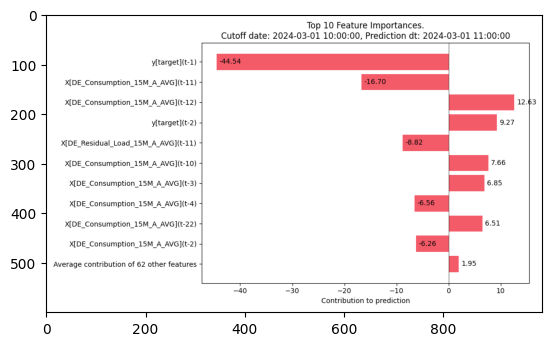

In [5]:
from client.plot_script import create_plot_payload

# 📊 Configure explanation visualization parameters
plot_url = base_url + "/plot"
plot_type = "explanation"  # Generate an explanation visualization
cutoff_days = "2024-03-01 10:00:00"     # When to start explanation analysis
prediction_for = "2024-03-01 11:00:00"  # Specific prediction time to explain

# 🎨 Create explanation plot payload
payload = create_plot_payload(
    session_id,      # Links to our prediction session
    plot_type,       # Request explanation visualization
    cutoff_days,     # Analysis start time
    prediction_for,  # Target prediction time
)

# 🖼️ Generate the explanation visualization
response = make_request(plot_url, payload, auth_key=auth_key)

# 🎯 Display the explanation plot
image_bytes = bytes_from_base64(response["response"]["data"])
plot_image(image_bytes)

print("🔍 Explanation plot reveals dual intelligence sources:")
print("\n📊 EXOGENOUS FEATURE CONTRIBUTIONS:")
print("  🏭 DE_Residual_Load_15M_A_AVG: How grid load imbalances influenced the prediction")
print("  ⚡ DE_Consumption_15M_A_AVG: How electricity consumption patterns affected the forecast")
print("  📈 Feature Importance: Relative strength of each external signal")

print("\n⏰ AUTOREGRESSIVE COMPONENT INSIGHTS:")
print("  🕐 Time Step Weights: Which of the 24 historical points were most important")
print("  📉 Pattern Recognition: How past price movements influenced future predictions")
print("  🔄 Temporal Dependencies: The model's internal understanding of time series dynamics")

print("\n🧠 MODEL DECISION BREAKDOWN:")
print("  🎯 Total Prediction = Autoregressive Component + Exogenous Feature Effects")
print("  ⚖️  Internal vs External: Balance between historical patterns and current external factors")
print("  📊 Transparency: Complete visibility into multi-source forecasting logic")

print(f"\n💡 Key Insight: The model combined {observation_length} historical time steps")
print(f"   with {len(features.split(',')) if features else 0} exogenous features to make this prediction!")

# 🎉 Congratulations! You've completed the Inait Predict workflow

You've successfully:
✅ Made predictions using the Inait Predict API  
✅ Visualized forecasting results with confidence intervals  
✅ Generated model explanations for interpretability  
✅ Created explanation visualizations for deeper insights  

## 🚀 Next Steps & Advanced Usage

### 📊 Work with Your Own Data
Replace `demo_power.csv` with your own time series data:
- Ensure your CSV has a datetime index
- Specify the correct `target_columns` for your data
- Adjust `forecasting_horizon` and `observation_length` as needed


---
*Happy forecasting with inait Predict! 🚀*